# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

Bagging menggunakan subset data acak untuk melatih beberapa model independen, kemudian menggabungkan hasilnya. Sementara itu, boosting melatih model secara berurutan, di mana setiap model baru memperbaiki kesalahan model sebelumnya. Bagging sendiri bertujuan untuk mengurangi varians, sedangkan boosting bertujuan untuk mengurangi bias

# Import Data & Libraries

In [35]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from DecisionTree import DecisionTree
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [ ]:
clf = RandomForestClassifier(random_state=67) # gunakan RandomForestClassifier dari Sklearn
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Accuracy: {accuracy_score(y_test, preds)}")

Accuracy: 0.9649122807017544


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [ ]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])

        return predictions

## Predict Using Random Forest

In [28]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.956140350877193


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [29]:
# define and train the model using GradientBoostingClassifier from Sklearn
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

preds = gb_clf.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Accuracy: {accuracy_score(y_test, preds)}")

Accuracy: 0.956140350877193


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            Fm = Fm + self.lr * h_i.predict(X)

            # Plotting
            axs[1].plot(y, ".")
            axs[1].plot(Fm, ".")
            axs[1].set_title(str(1))
            axs[1].axis("off")

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


## Predict Using Gradient Boosting

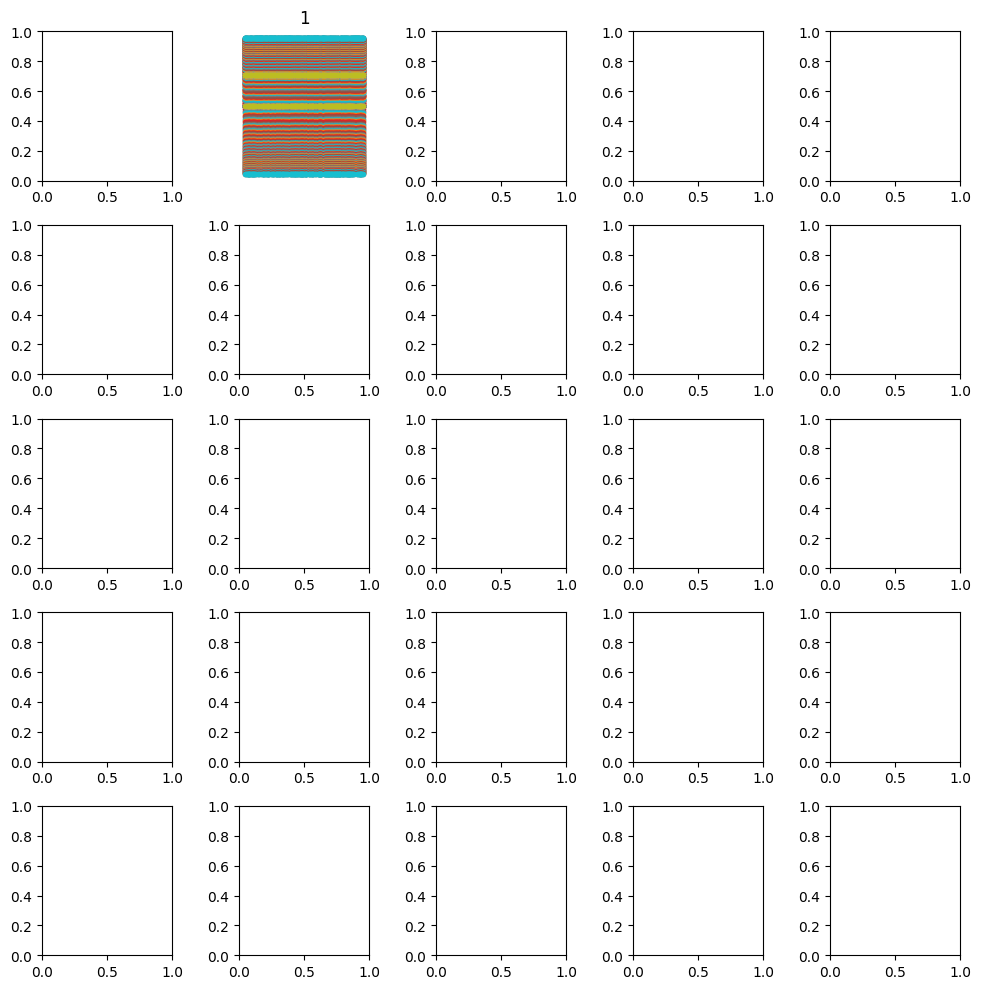

In [40]:
# define and train the model
gb_scratch = gradientBoostingClassifier(n_estimators=100, lr=0.1, base_learner=DecisionTreeRegressor)
gb_scratch.fit(X_train, y_train)

In [41]:
# get predictions:
preds = gb_scratch.predict(X_test)

# print score menggunakan metrik accuracy
print(f"Accuracy: {accuracy(y_test, preds)}")

Accuracy: 0.9473684210526315


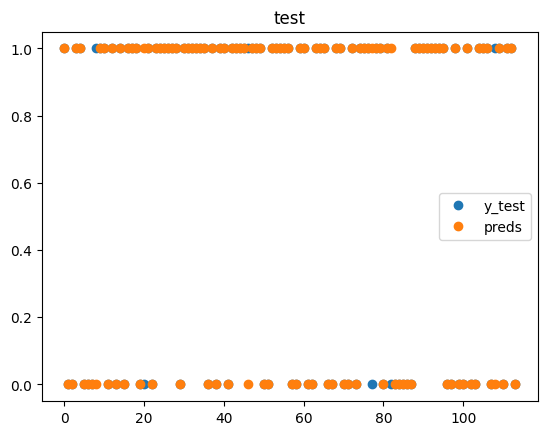

In [42]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()